# Predict the approximate position and velocity of the satellite orbiting the earth after 4 hours since it passed the periapsis.

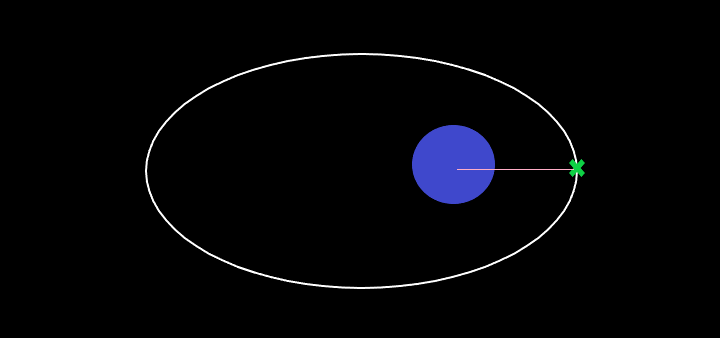

In [ ]:
#Importing libraries
import numpy as np

In [ ]:
#Constants required
G= 6.6743e-11
Me=5.972e24 #Mass of earth
a=25512e3   #Semi major axis of the orbit
e=0.625     #Eccentricity of the orbit
t=4*3600    #Time in seconds

In [ ]:
#Step 1 finding the Mean Anomaly
u=G*Me;
n=np.sqrt(u/a**3)
M=n*t
print(f'The Mean Anomaly is {round(M,3)} rad')

The Mean Anomaly is 2.231 rad


In [ ]:
#Step 2 finding the Eccentric Anomaly

def kepler_eqn(M,E,e):
  return (E-e*np.sin(E)-M)

def kepler_deriv(E,e):
  return (1-e*np.cos(E))

def newton_raphson(eps,x0,func,dfunc):
  xn=x0;
  fn=func(xn)
  i=0
  while(abs(fn) > eps):
    xn=xn - fn/dfunc(xn)
    fn=func(xn)
    i+=1
    if i ==100:
      print("Failed to converge after 100 iterations")
      break
    return xn

x0=M
eps=1e-6
E= newton_raphson(eps,x0,func=lambda E: kepler_eqn(E,M,e),dfunc=lambda E: kepler_deriv(E,e))

print(f'The Eccentric Anomaly is {round(E,3)} rad')

The Eccentric Anomaly is 2.588 rad


In [ ]:
#Step 3 finding the True Anomaly
F=2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2))
print(f'The True Anomaly is {round(F,3)} rad')

The True Anomaly is 2.87 rad


In [ ]:
#Finding position and velocity
r=a*(1-e**2)/(1+e*np.cos(F))
v=np.sqrt(u*(2/r-1/a))
print(f'The Position is {round(r/1000,3)} Km from the center of earth.')
print(f'The Velocity is {round(v/1000,3)} Km/hr.')

The Position is 39074.669 Km from the center of earth.
The Velocity is 2.186 Km/hr.



# Final Position
 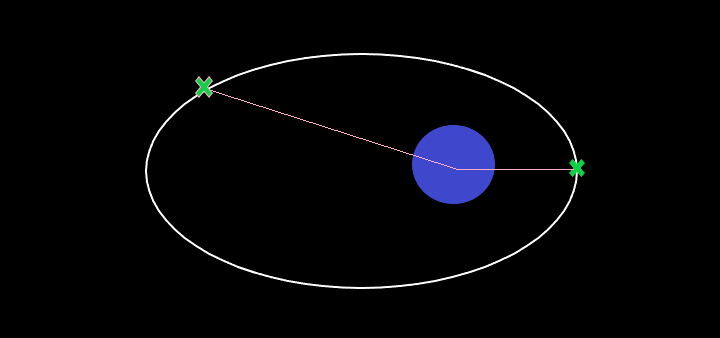

# Thanks to Spartifical Innovations